# Self Driving Car Engineer Nanodegree
## Deep Learning

## Project: Behavioral Cloning

In this notebook, i am going to use behavioral cloning to to try and drive a car around a track in a simulator.

First, i am going to drive around the track manually as i'm recording screenshots and the measurements that the car may need such as steering, throtle, etc... 

In this project, i will only use steering angels. I will feed the data to the neural network and let it drive the car by itself. 

### How the data was collected

First, i drove the car two times around the first track. The first one was counter clock wise, but, the second time i drove the car clock wise around the track (i.e: i inverted the car position and drove from the end of the track to the beginning.)



Regarding the three cameras, i added a correction factor to the right and left camera and used them to help me with the training to generalize the model.

### First, import some important libraries 

In [1]:
import csv
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dropout, Conv2D, Flatten, Dense, Lambda, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model, Sequential

%matplotlib inline 

Using TensorFlow backend.


### Read the measurements and the files names from the .csv file

In [2]:
csvlines = [] ### append the files names and the measurements here

with open('./Training Data\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        csvlines.append(line)

### Append the measured angles and the images in numpy arrays and display a test image with dimensions

(10080, 160, 320, 3)
(10080,)


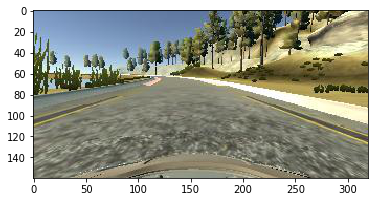

In [3]:
images = []
measurements = []
img = csvlines[0]
source_path = img[0]
img = mpimg.imread(source_path)
plt.imshow(img)
for line in csvlines:
    center_image = mpimg.imread(line[0])
    left_image = mpimg.imread(line[1])
    right_image = mpimg.imread(line[2])
    steering_center = float(line[3])
    correction = 0.2
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    images.append(center_image)
    measurements.append(steering_center)
    images.append(left_image)
    measurements.append(steering_left)
    images.append(right_image)
    measurements.append(steering_right)
    
X_train = np.array(images)
y_train = np.array(measurements)
print(X_train.shape)
print(y_train.shape)

### Train the neural network to drive the car

The first two steps are for data preprocessing then i trained the network.

#### The network consists of :
1. Normalization layer
2. Cropping layer. Crop the images from the upper and lower part of the images to help the model train faster
3. Convolution layer -with filter size = 32- followed by a relu activation
4. Max pooling layer with filter size of 2x2.
5. Convolution layer -with filter size = 48- followed by a relu activation
6. Max pooling layer with filter size of 2x2.
7. Convolution layer -with filter size = 64- followed by a relu activation
8. Max pooling layer with filter size of 2x2.
9. flatten the array to 1-D array to process it with a fully connected network.
10. hidden layer with 128 hidden neuron followed by a relu activation and dropout with keep_prob = 50%.
11. hidden layer with 64 hidden neuron followed by a relu activation and dropout with keep_prob = 50%.
12. hidden layer with 32 hidden neuron followed by a relu activation and dropout with keep_prob = 50%.
13. the output neuron for the steering angle.

In [4]:
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping = ((70,25), (0,0))))
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

### Train the neural network using mean squared error loss and Adam Optimizer

Shuffle the data, use 5 epochs and split 20% of the data for validation, and, save the model in "model.h5".

In [5]:
model.compile(loss='mse', optimizer='adam')
history_object = model.fit(X_train, y_train, validation_split = 0.2,epochs = 5, shuffle = True)
model.save('model.h5')

Train on 8064 samples, validate on 2016 samples
Epoch 1/5
8064/8064 [==============================] - 49s 6ms/step - loss: 0.0367 - val_loss: 0.0488
Epoch 2/5
8064/8064 [==============================] - 43s 5ms/step - loss: 0.0265 - val_loss: 0.0448
Epoch 3/5
8064/8064 [==============================] - 43s 5ms/step - loss: 0.0246 - val_loss: 0.0445
Epoch 4/5
8064/8064 [==============================] - 43s 5ms/step - loss: 0.0241 - val_loss: 0.0451
Epoch 5/5
8064/8064 [==============================] - 43s 5ms/step - loss: 0.0228 - val_loss: 0.0445


### Plot the training and validation loss

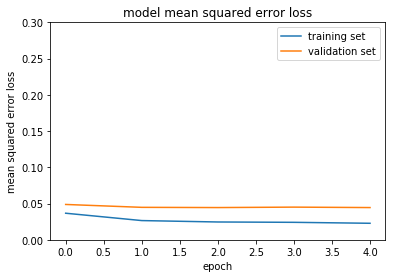

In [6]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
axes = plt.gca()
axes.set_ylim([0,0.3])
plt.savefig("trainVSvalid_error.jpg")
plt.show()